# Problem number-1
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


# Importing Libraries

In [139]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix

# IMPORTING CSV FILE

In [140]:
ls


 Volume in drive C is ssd
 Volume Serial Number is 344C-651C

 Directory of C:\Users\phoneclicker\Downloads\excelr_kd\ASSIGNMENT\Decision_tree

01/04/2023  05:54 PM    <DIR>          .
01/04/2023  05:54 PM    <DIR>          ..
01/04/2023  05:54 PM    <DIR>          .ipynb_checkpoints
11/29/2022  03:32 PM            17,023 Company_Data.csv
01/04/2023  05:52 PM         1,701,960 Company-14.ipynb
11/29/2022  03:32 PM            21,837 Fraud_check.csv
01/04/2023  05:54 PM           830,036 Fraud-14.ipynb
11/29/2022  03:32 PM             1,377 problem statement(company data).txt
11/29/2022  03:32 PM               460 Problem_statement(Fraudcheck).txt
               6 File(s)      2,572,693 bytes
               3 Dir(s)  20,795,949,056 bytes free


In [141]:
fraud=pd.read_csv("Fraud_check.csv.")

# EDA

In [142]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [143]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [144]:
fraud.info

<bound method DataFrame.info of     Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..           

In [145]:
fraud.shape

(600, 6)

In [146]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [147]:
fraud.duplicated().sum()

0

# Feature Engineering

 Adding A New Column "Fraud_Check"

In [148]:
fraud['Fraud_Check'] = pd.cut(fraud['Taxable.Income'], bins=[0, 30000, 1000000], labels=['Risk', 'No Risk'])

In [149]:
np.unique(fraud["Fraud_Check"])

array(['No Risk', 'Risk'], dtype=object)

In [150]:
fraud["Fraud_Check"].value_counts()

No Risk    476
Risk       124
Name: Fraud_Check, dtype: int64

# Using Label Encoding


In [151]:
label_encoder = preprocessing.LabelEncoder()

In [152]:
fraud['Undergrad']= label_encoder.fit_transform(fraud['Undergrad'])
fraud['Marital.Status']= label_encoder.fit_transform(fraud['Marital.Status'])
fraud['Urban']= label_encoder.fit_transform(fraud['Urban'])
fraud['Fraud_Check']= label_encoder.fit_transform(fraud['Fraud_Check'])

In [153]:
fraud_mod=fraud

In [154]:
fraud_mod.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_Check
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [155]:
fraud_mod["Fraud_Check"].value_counts()


0    476
1    124
Name: Fraud_Check, dtype: int64

In [156]:
fraud_mod["Urban"].value_counts()


1    302
0    298
Name: Urban, dtype: int64

In [157]:
fraud_mod["Marital.Status"].value_counts()


2    217
1    194
0    189
Name: Marital.Status, dtype: int64

In [158]:
fraud_mod["Undergrad"].value_counts()

1    312
0    288
Name: Undergrad, dtype: int64

# Splitting Data

In [159]:
X=fraud_mod.iloc[:,0:-1]
y=fraud_mod.iloc[:,-1]

In [160]:
X.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [161]:
X.shape

(600, 6)

In [162]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Fraud_Check, dtype: int32

In [163]:
y.shape

(600,)

# Training - Testing Data

In [164]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [165]:
X_train.shape

(402, 6)

In [166]:
X_test.shape

(198, 6)

In [167]:
y_train.shape

(402,)

In [168]:
y_test.shape

(198,)

# Building Decision Tree Classifier using "gini" Criteria

In [169]:
first_model=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=2)

In [170]:
first_model

DecisionTreeClassifier(max_depth=10)

In [171]:
first_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [172]:
pred=first_model.predict(X_test)

In [173]:
pred

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

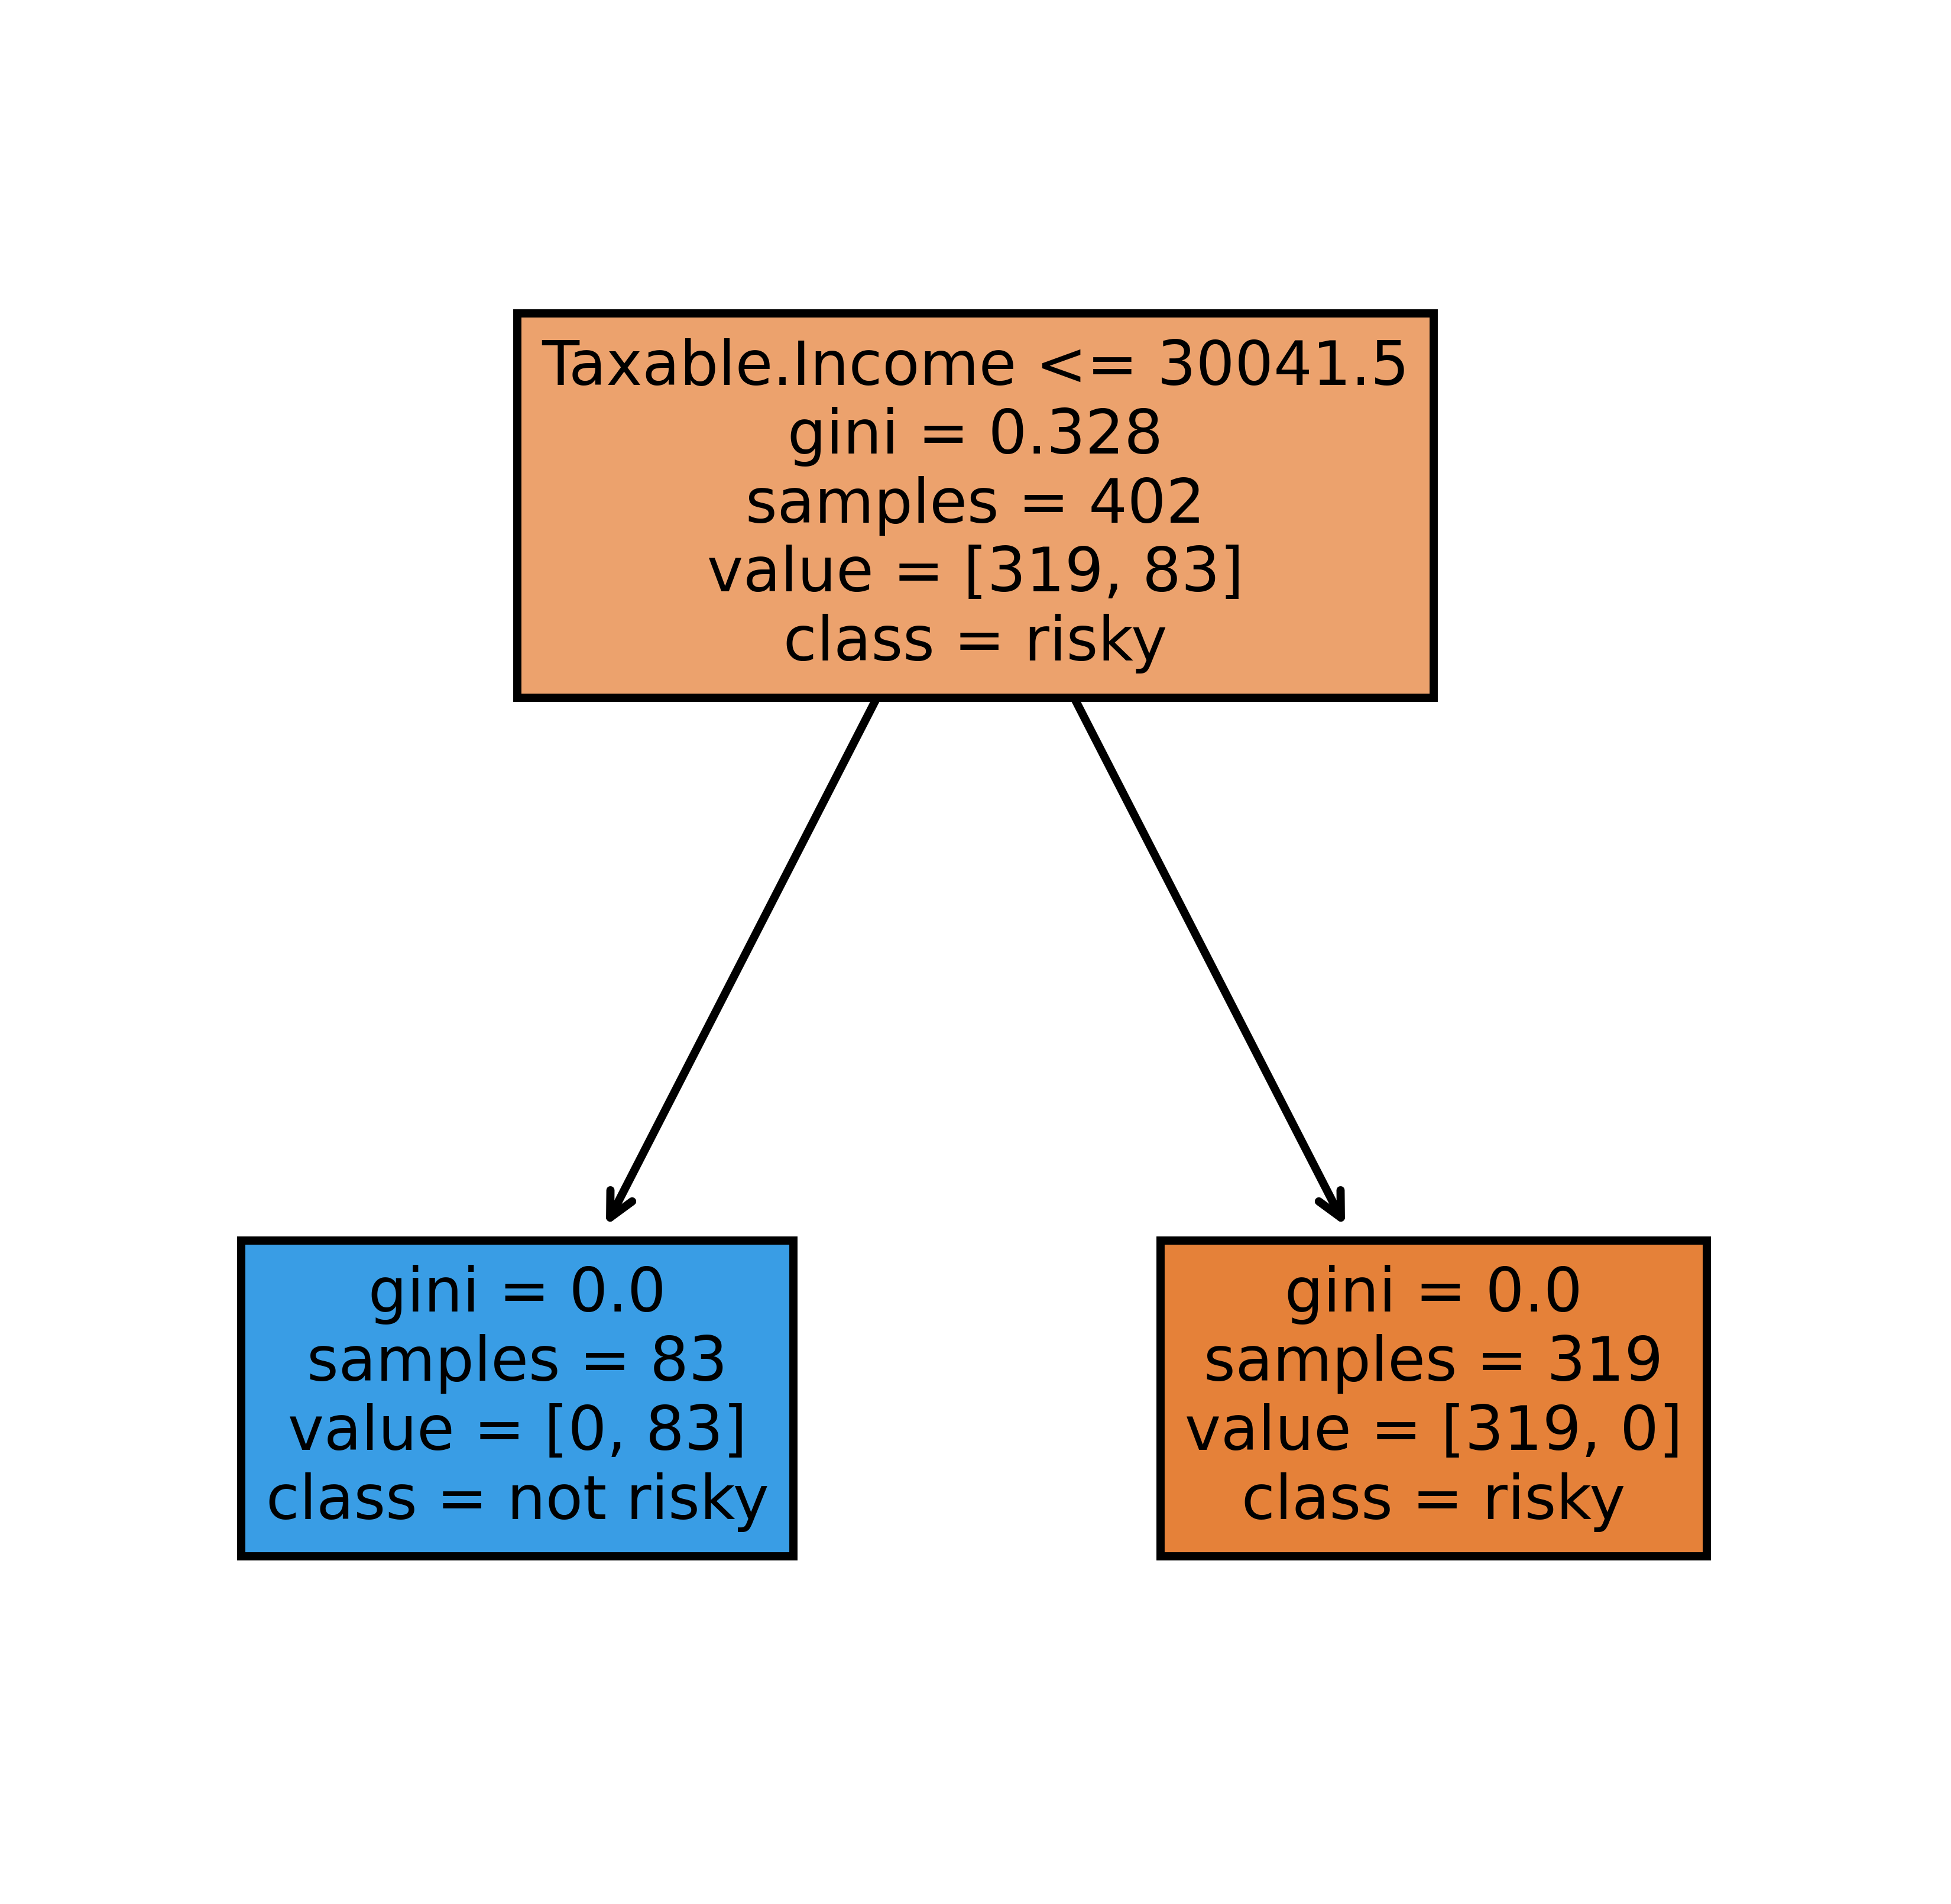

In [174]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['risky', 'not risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(first_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Accuracy

In [175]:
accuracy_score(pred,y_test)

1.0

In [176]:
from sklearn.metrics import classification_report


In [177]:
print(classification_report(y_test,pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00        41

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198



In [178]:
print(confusion_matrix(y_test,pred))

[[157   0]
 [  0  41]]


# Building Decision Tree Classifier using "entropy" Criteria

In [179]:
second_model=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=2)

In [180]:
second_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [181]:
pred_second=second_model.predict(X_test)

In [182]:
pred_second

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

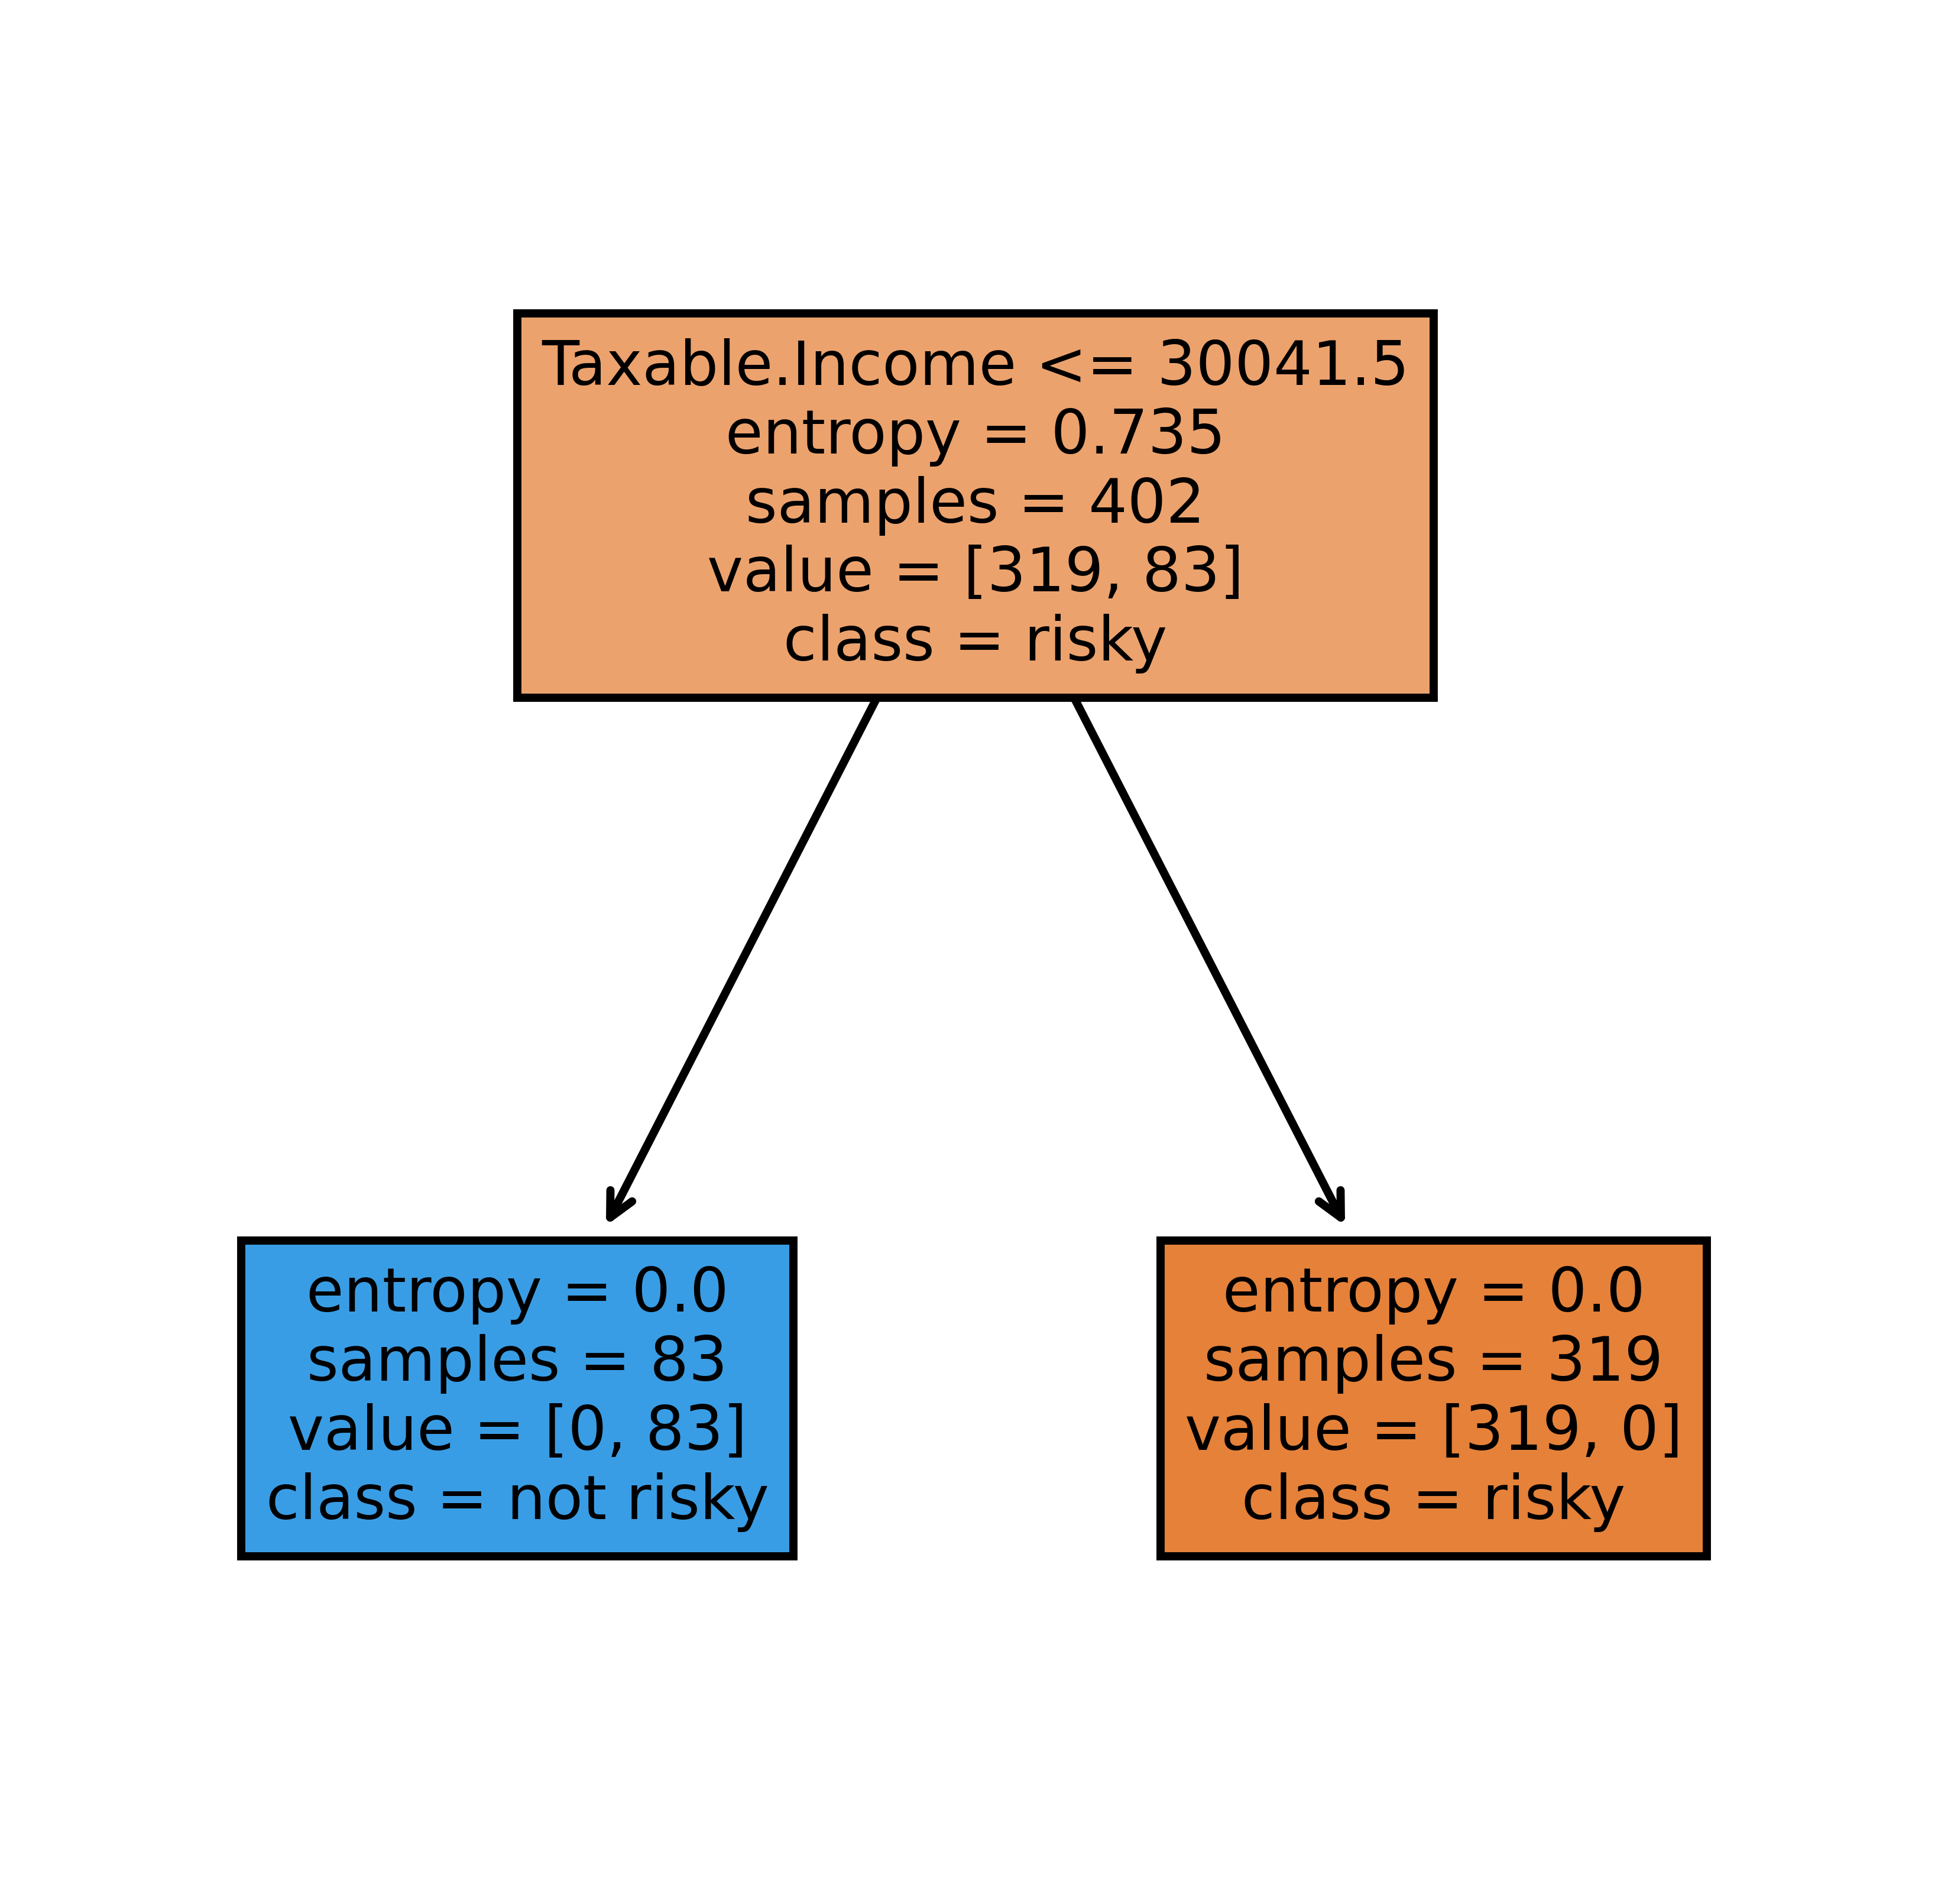

In [183]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['risky', 'not risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(second_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Accuracy

In [184]:
accuracy_score(pred_second,y_test)

1.0

In [185]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_second)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00        41

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198



In [186]:
print(confusion_matrix(y_test,pred_second))

[[157   0]
 [  0  41]]


# Both "gini" & "entropy" Criteria gives maximum accuracy